import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Today we will cover handling outlier with iqr.
#we use when data distribution is skewed. so use of this method we should have the knowledge of box plot and iqr plot.

In [5]:
#we have the boxplot with the some percentile values.like 0%,25%,50%,75% and 100%.then we have whisker that are range betwwen 2 and 75% percentile.Q21

In [7]:
df=pd.read_csv("placement.csv")
df.head(4)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1


In [9]:
df.shape

(1000, 3)

In [10]:
#so first of all we get the disribution plot o the data so we know better that which columns data is skewed so becuae the iqr method should be applied
#onthe skewed data.

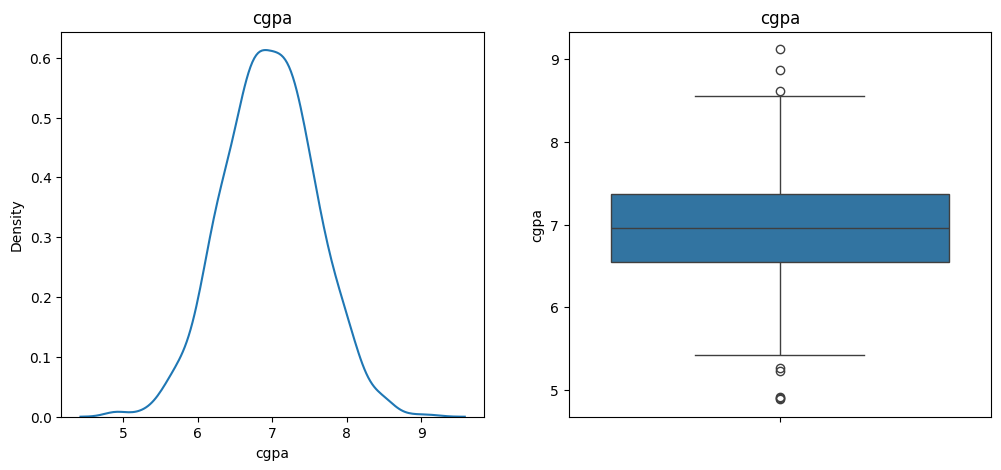

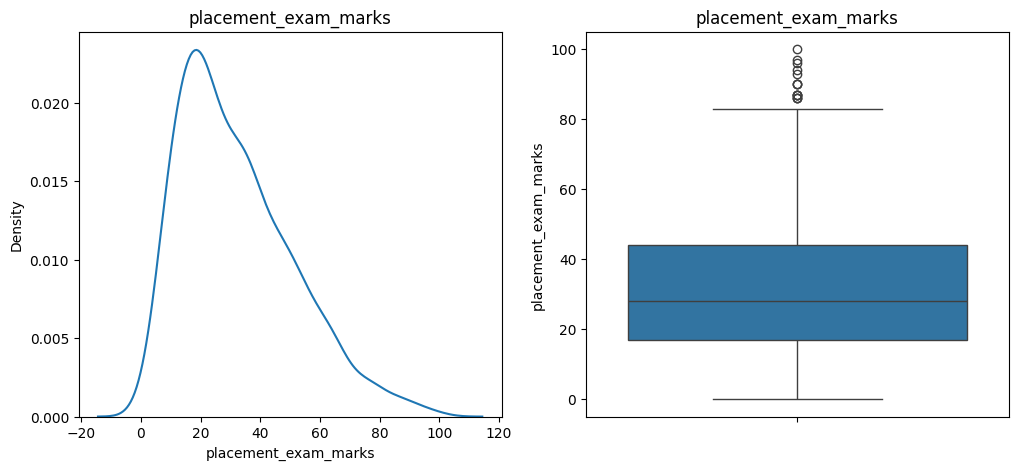

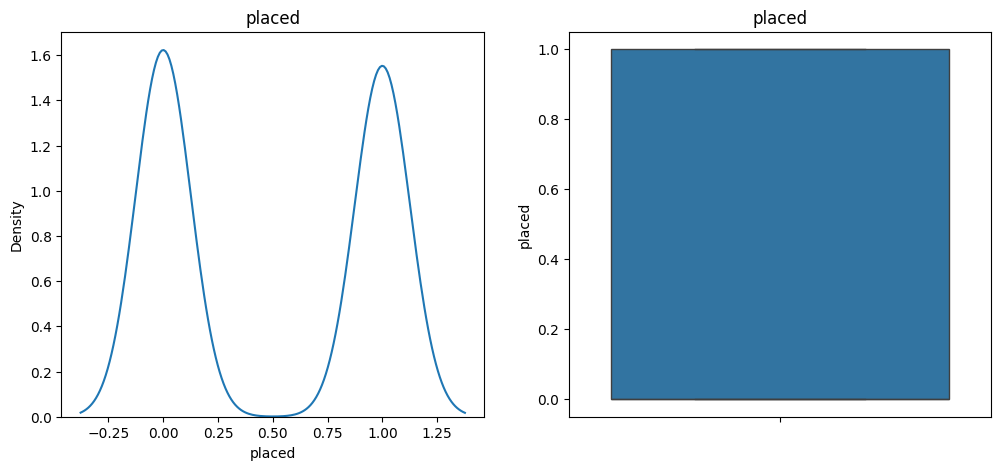

In [19]:
for col in df.columns:
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    sns.kdeplot(df[col])
    plt.title(col)

    plt.subplot(122)
    sns.boxplot(df[col])
    plt.title(col)

In [24]:
#Now
print("skewness of placement_exam_marks",df["placement_exam_marks"].skew())
print("skewness of cgpa",df["cgpa"].skew())

skewness of placement_exam_marks 0.8356419499466834
skewness of cgpa -0.014529938929314918


In [25]:
df["placement_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

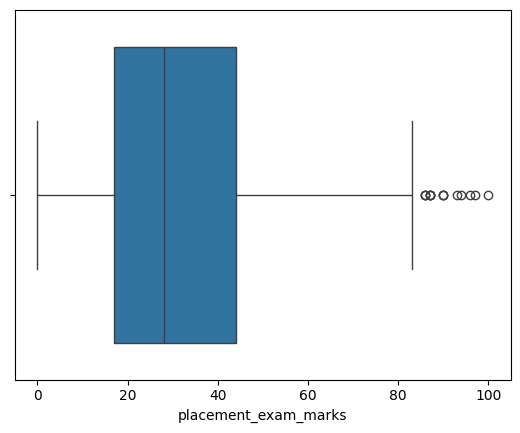

In [32]:
sns.boxplot(df["placement_exam_marks"],orient="h")

In [38]:
#Now get the iqr for that we need the percentage of 25b and 75.
percent25=df["placement_exam_marks"].quantile(0.25)
percent75=df["placement_exam_marks"].quantile(0.75)

In [44]:
iqr=percent75-percent25
iqr

27.0

In [45]:
upper_limit=percent75 + 1.5*iqr
lower_limit=percent25 -1.5*iqr

In [47]:
print(upper_limit)
print(lower_limit)

84.5
-23.5


In [49]:
df[(df["placement_exam_marks"]>upper_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [50]:
df=df[(df["placement_exam_marks"]<upper_limit)]

In [51]:
df.shape

(985, 3)

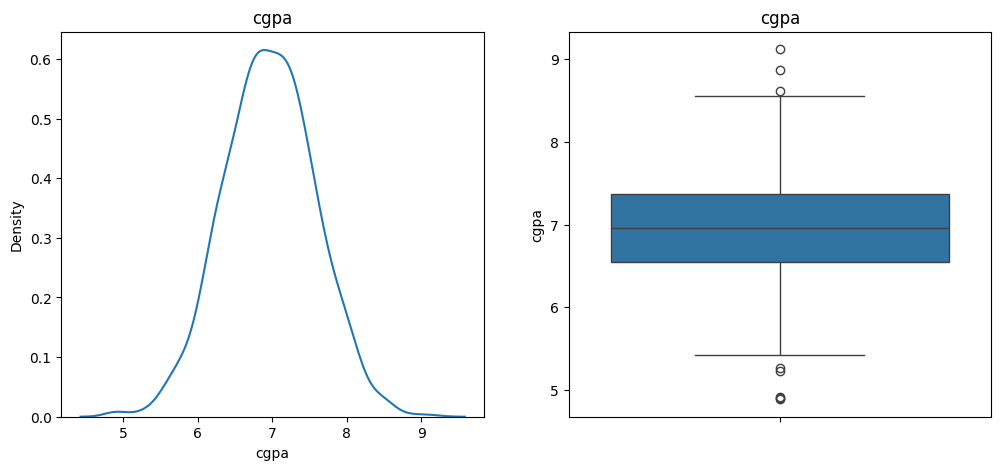

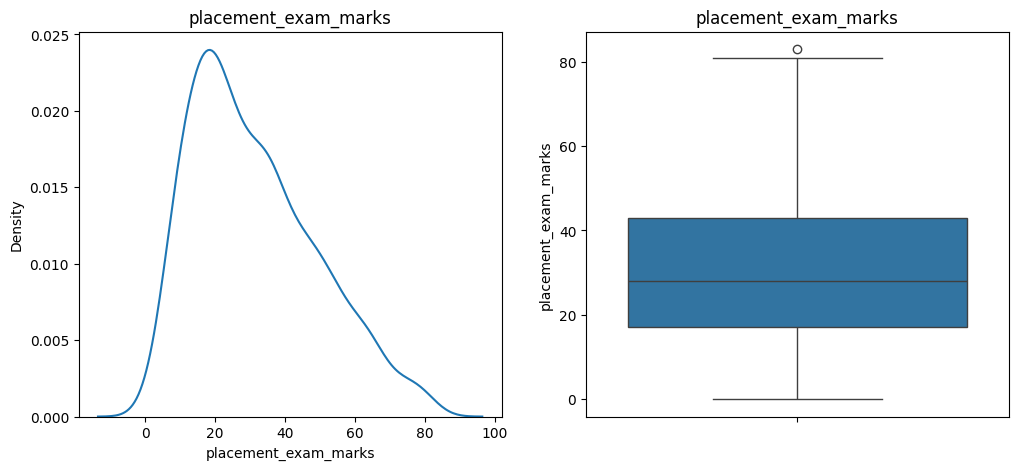

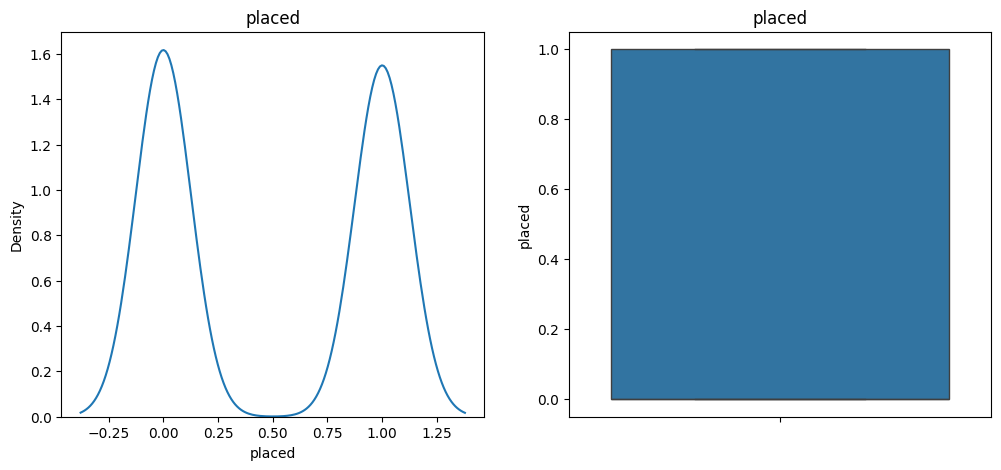

In [53]:
for col in df.columns:
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    sns.kdeplot(df[col])
    plt.title(col)

    plt.subplot(122)
    sns.boxplot(df[col])
    plt.title(col)

In [58]:
#if we want to cap.
df["placement_exam_marks"]=np.where(
    df["placement_exam_marks"]>upper_limit,
    upper_limit,
    np.where(df["placement_exam_marks"]<lower_limit,
    lower_limit,
    df["placement_exam_marks"]
))

C:\Users\Waris Hayyat\AppData\Local\Temp\ipykernel_8172\1678334170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["placement_exam_marks"]=np.where(


In [59]:
V

NameError: name 'V' is not defined

In [72]:
#Now i am checking with side by side comparsion with z score outlier detection.
df=pd.read_csv("placement.csv")
df.head(4)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1


In [73]:
upper_limit=(df["placement_exam_marks"].mean() +3*df["placement_exam_marks"].std())
lower_limit=(df["placement_exam_marks"].mean() -3*df["placement_exam_marks"].std())
print("upper_limit:",(df["placement_exam_marks"].mean() +3*df["placement_exam_marks"].std()))
print("Lowe_limit:",(df["placement_exam_marks"].mean() -3*df["placement_exam_marks"].std()))

upper_limit: 89.61746701676336
Lowe_limit: -25.16746701676336


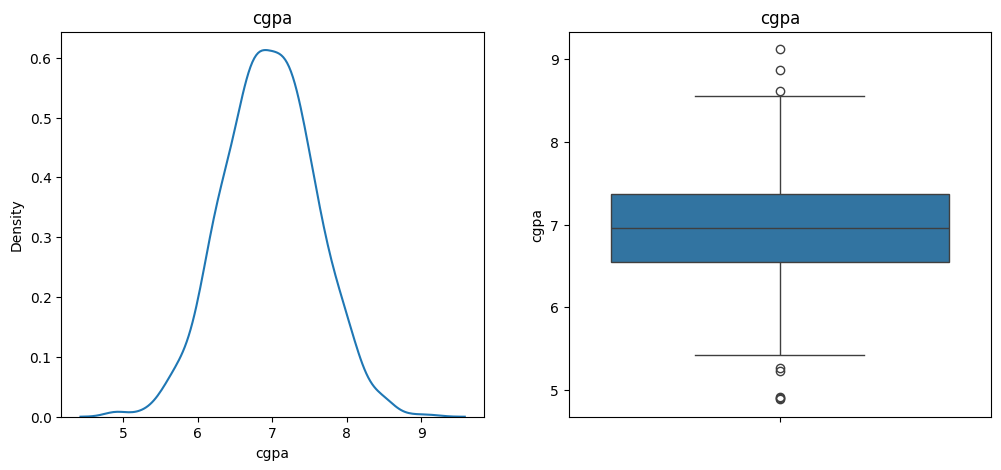

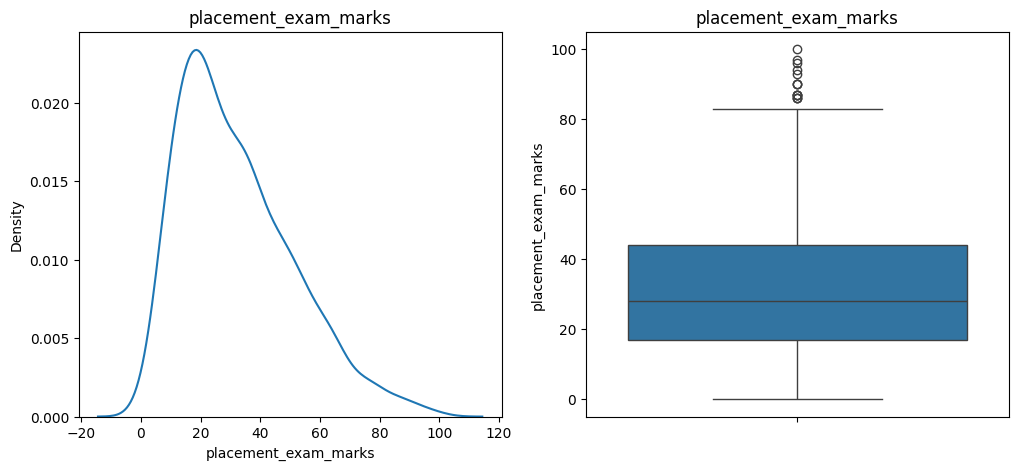

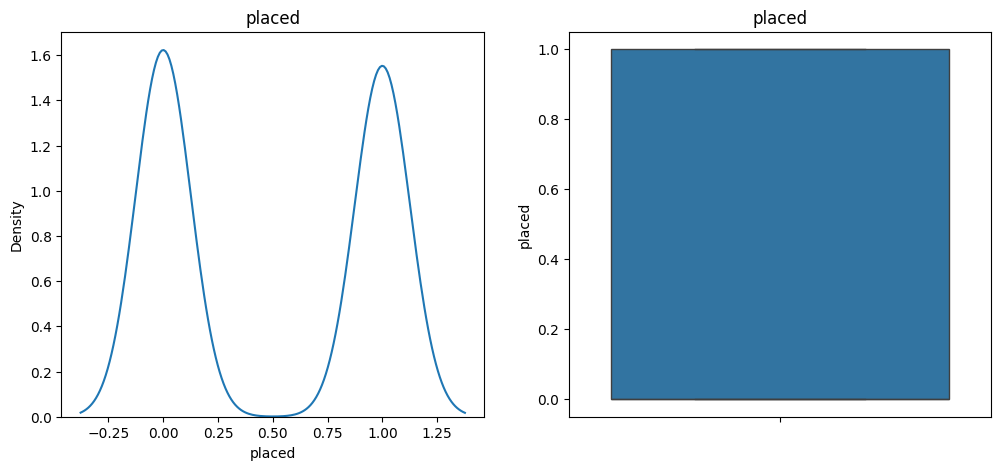

In [74]:
for col in df.columns:
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    sns.kdeplot(df[col])
    plt.title(col)

    plt.subplot(122)
    sns.boxplot(df[col])
    plt.title(col)

In [75]:
#1;ist_one is triming:
# df=df[(df["placement_exam_marks"]<upper_limit) & (df["placement_exam_marks"]>lower_limit)]
#2:now i do capping instead of trimming the vaues
df["placement_exam_marks"]=np.where(
    df["placement_exam_marks"] > upper_limit,
    upper_limit,
    np.where(df["placement_exam_marks"] < lower_limit,
    lower_limit,
    df["placement_exam_marks"])
)

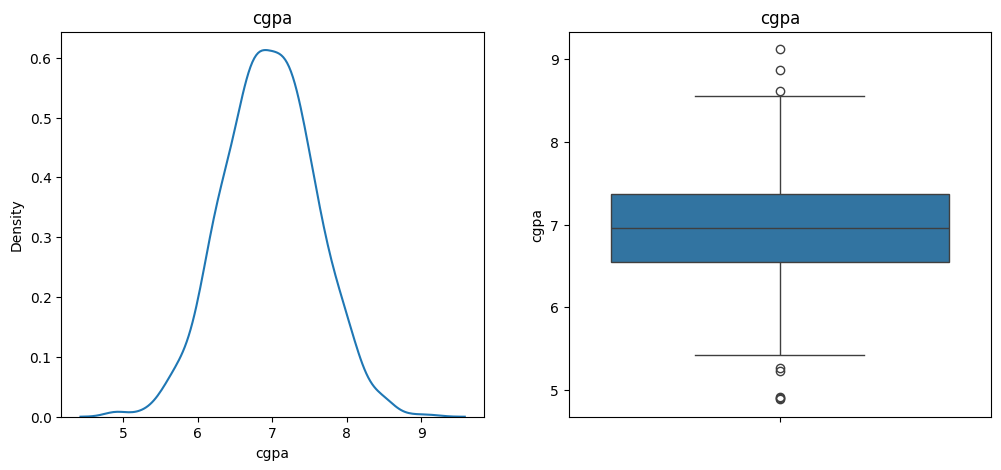

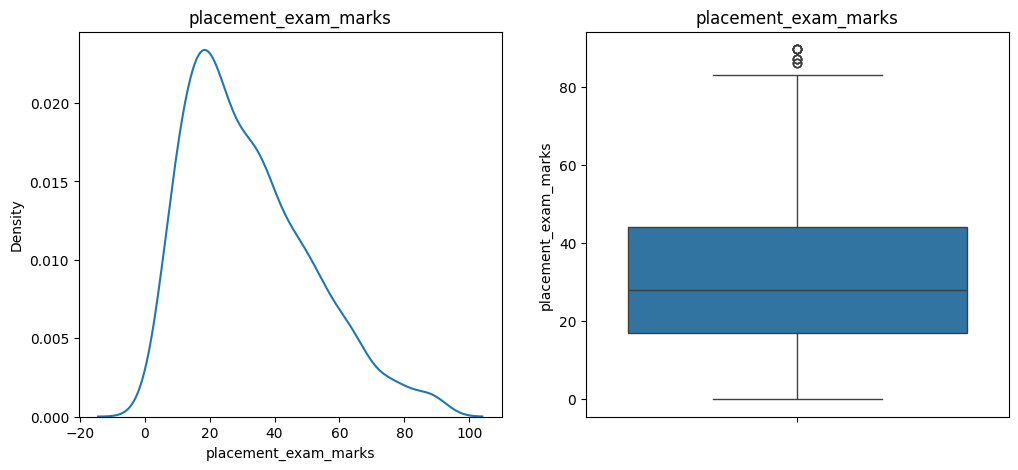

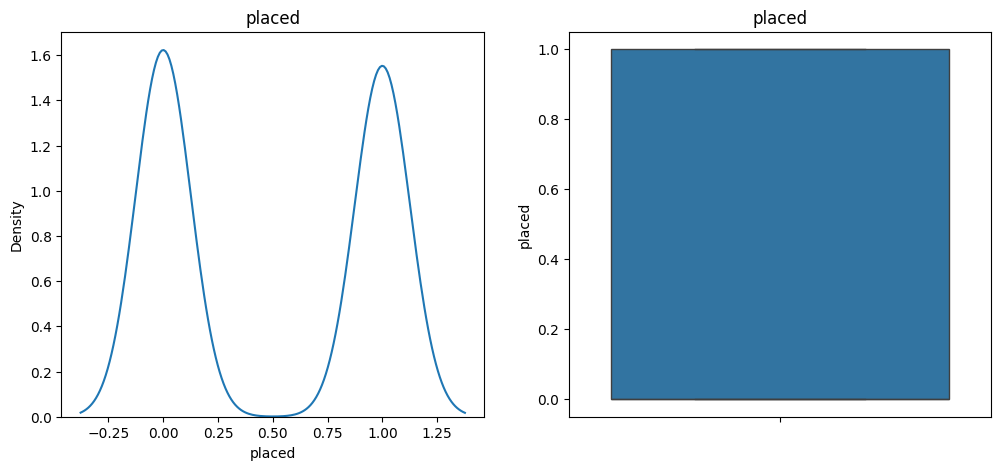

In [77]:
for col in df.columns:
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    sns.kdeplot(df[col])
    plt.title(col)

    plt.subplot(122)
    sns.boxplot(df[col])
    plt.title(col)

In [78]:
df.shape

(1000, 3)